# Data Augmentation

In order to have better results with our test set, we'll augment the size of our training using Data Augmentation

## What to do?

At the end of this notebook, we'll start again the cat example after using the data augmentation techniques.

## Organization of this Notebook 
    1. Packages
    2. Import of images
    3. Mirror images
    4. Rotate images

## 1 - Packages ##

- [numpy](www.numpy.org): the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org): a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org): a famous library to plot graphs in Python.
- [L_NN](L_NN.py): my own L-layer Neural Network implementation

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from L_NN import *
from py_utils import load_dataset # Copy/pasted loader

%matplotlib inline

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 2- Import of images ##

In [2]:
training_imgLoaded, training_label, testing_imgLoaded, testing_label, classes = load_dataset()

Here, we reshape and normalize the images to have a $(height*width*3 \text{ x } 1)$ matrix with pixels values between $0$ and $1$.

In [3]:
training_img = training_imgLoaded.reshape(training_imgLoaded.shape[0], -1).T / 255.
testing_img = testing_imgLoaded.reshape(testing_imgLoaded.shape[0], -1).T / 255.

In [4]:
print("Number of pixels: %i" %(training_img.shape[0]))
print("Number of training data: %i" %(training_img.shape[1]))

Number of pixels: 12288
Number of training data: 209


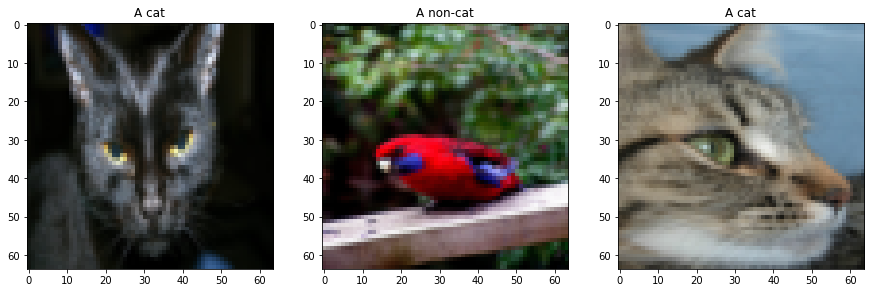

In [5]:
plt.figure(figsize=(15,40))
plt.subplot(1, 3, 1)
plt.title("A cat")
plt.imshow(training_imgLoaded[25])
plt.subplot(1, 3, 2)
plt.title("A non-cat")
plt.imshow(training_imgLoaded[35])
plt.subplot(1, 3, 3)
plt.title("A cat")
plt.imshow(training_imgLoaded[68])

## 3 - Mirror Images ##

In [6]:
m = training_imgLoaded.shape[0]
train_mirror_img = np.concatenate((training_imgLoaded, [np.flip(training_imgLoaded[0], axis = 1)]), axis = 0)
for i in range(1,m):
    train_mirror_img = np.concatenate((train_mirror_img, [np.flip(training_imgLoaded[i], axis = 1)]), axis = 0)
train_mirror_label = np.concatenate((training_label, training_label), axis = 1)

assert(train_mirror_label.shape[1] == train_mirror_img.shape[0])

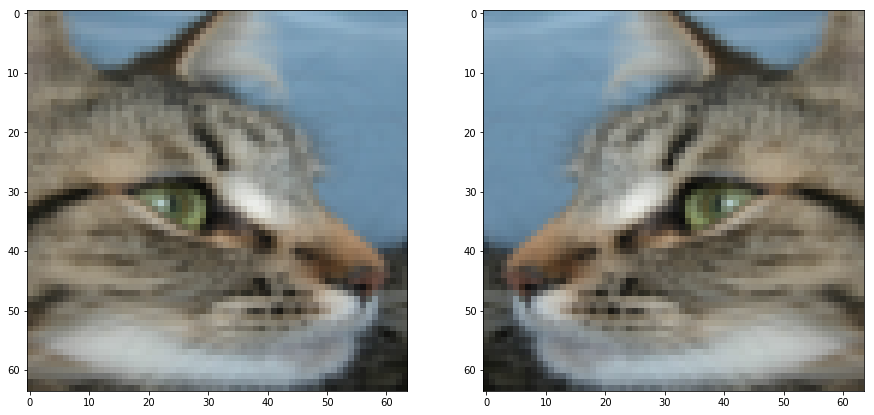

In [7]:
plt.figure(figsize=(15,40))
plt.subplot(1, 2, 1)
plt.imshow(train_mirror_img[68])
plt.subplot(1, 2, 2)
plt.imshow(train_mirror_img[m + 68])

In [8]:
layerDims = [12288, 20, 7, 5, 1]
actFunctions =  ["ReLU", "ReLU", "ReLU", "sigmoid"]

In [9]:
training_img = train_mirror_img.reshape(train_mirror_img.shape[0], -1).T / 255.

In [10]:
parameters = model(training_img, train_mirror_label, layerDims, actFunctions, num_iterations = 4000, learning_rate = 0.0035, print_cost = True)

Cost after iteration 0: 0.793576
Cost after iteration 100: 0.519142
Cost after iteration 200: 0.439544
Cost after iteration 300: 0.387501
Cost after iteration 400: 0.350261
Cost after iteration 500: 0.308253
Cost after iteration 600: 0.230304
Cost after iteration 700: 0.218199
Cost after iteration 800: 0.215647
Cost after iteration 900: 0.197059
Cost after iteration 1000: 0.103403
Cost after iteration 1100: 0.075046
Cost after iteration 1200: 0.077475
Cost after iteration 1300: 0.051087
Cost after iteration 1400: 0.039411
Cost after iteration 1500: 0.032767
Cost after iteration 1600: 0.028113
Cost after iteration 1700: 0.024389
Cost after iteration 1800: 0.021270
Cost after iteration 1900: 0.018685
Cost after iteration 2000: 0.016693
Cost after iteration 2100: 0.014628
Cost after iteration 2200: 0.013096
Cost after iteration 2300: 0.011856
Cost after iteration 2400: 0.010784
Cost after iteration 2500: 0.009875
Cost after iteration 2600: 0.009067
Cost after iteration 2700: 0.008379
Cost

In [11]:
print("TRAINING SET:\nAccuracy: %f" %(visualize_decision(parameters, train_mirror_img, train_mirror_label, display_img = False)))

print("TESTING SET:\nAccuracy: %f" %(visualize_decision(parameters, testing_imgLoaded, testing_label, display_img = False)))

TRAINING SET:
Accuracy: 1.000000
TESTING SET:
Accuracy: 0.760000


## 4 - Rotate Images ##

In [19]:
angle = np.random.randint(10,30)
    
pilImage = Image.fromarray(training_imgLoaded[0].astype('uint8'), 'RGB')
pilRotat = pilImage.rotate(angle, resample=Image.BICUBIC, expand=False)

npRot = np.array(pilRotat.getdata()).reshape(pilRotat.size[0], pilRotat.size[1], 3)

train_mirrorandrotate_img = np.concatenate((train_mirror_img, [npRot]), axis = 0)

for i in range(1, m):
    angle = np.random.randint(10,30)
    
    pilImage = Image.fromarray(training_imgLoaded[i].astype('uint8'), 'RGB')
    pilRotat = pilImage.rotate(angle, resample=Image.BICUBIC, expand=False)
    
    npRot = np.array(pilRotat.getdata()).reshape(pilRotat.size[0], pilRotat.size[1], 3)
    
    train_mirrorandrotate_img = np.concatenate((train_mirrorandrotate_img, [npRot]), axis = 0)
    
train_mirrorandrotate_label = np.concatenate((training_label, train_mirror_label), axis = 1)

assert(train_mirrorandrotate_label.shape[1] == train_mirrorandrotate_img.shape[0])

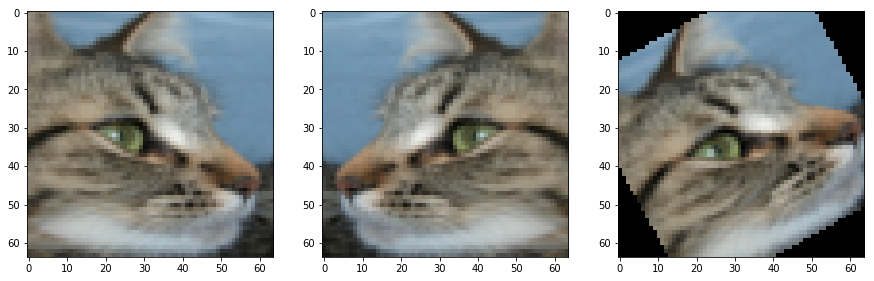

In [22]:
plt.figure(figsize=(15,40))
plt.subplot(1, 3, 1)
plt.imshow(train_mirrorandrotate_img[68])
plt.subplot(1, 3, 2)
plt.imshow(train_mirrorandrotate_img[m + 68])
plt.subplot(1, 3, 3)
plt.imshow(train_mirrorandrotate_img[2*m + 68])

In [23]:
training_img = train_mirrorandrotate_img.reshape(train_mirrorandrotate_img.shape[0], -1).T / 255.

In [27]:
parameters = model(training_img, train_mirrorandrotate_label, layerDims, actFunctions, num_iterations = 5000, learning_rate = 0.0008, print_cost = True)

Cost after iteration 0: 0.651888
Cost after iteration 100: 0.548677
Cost after iteration 200: 0.515070
Cost after iteration 300: 0.481660
Cost after iteration 400: 0.456285
Cost after iteration 500: 0.432337
Cost after iteration 600: 0.407365
Cost after iteration 700: 0.385261
Cost after iteration 800: 0.358301
Cost after iteration 900: 0.353289
Cost after iteration 1000: 0.330552
Cost after iteration 1100: 0.289107
Cost after iteration 1200: 0.293225
Cost after iteration 1300: 0.243263
Cost after iteration 1400: 0.214187
Cost after iteration 1500: 0.208352
Cost after iteration 1600: 0.169692
Cost after iteration 1700: 0.258492
Cost after iteration 1800: 0.243787
Cost after iteration 1900: 0.146252
Cost after iteration 2000: 0.113635
Cost after iteration 2100: 0.116060
Cost after iteration 2200: 0.105863
Cost after iteration 2300: 0.089057
Cost after iteration 2400: 0.081502
Cost after iteration 2500: 0.073909
Cost after iteration 2600: 0.068455
Cost after iteration 2700: 0.064073
Cost

TRAINING SET:
Accuracy: 0.995215
TESTING SET:
Accuracy: 0.800000


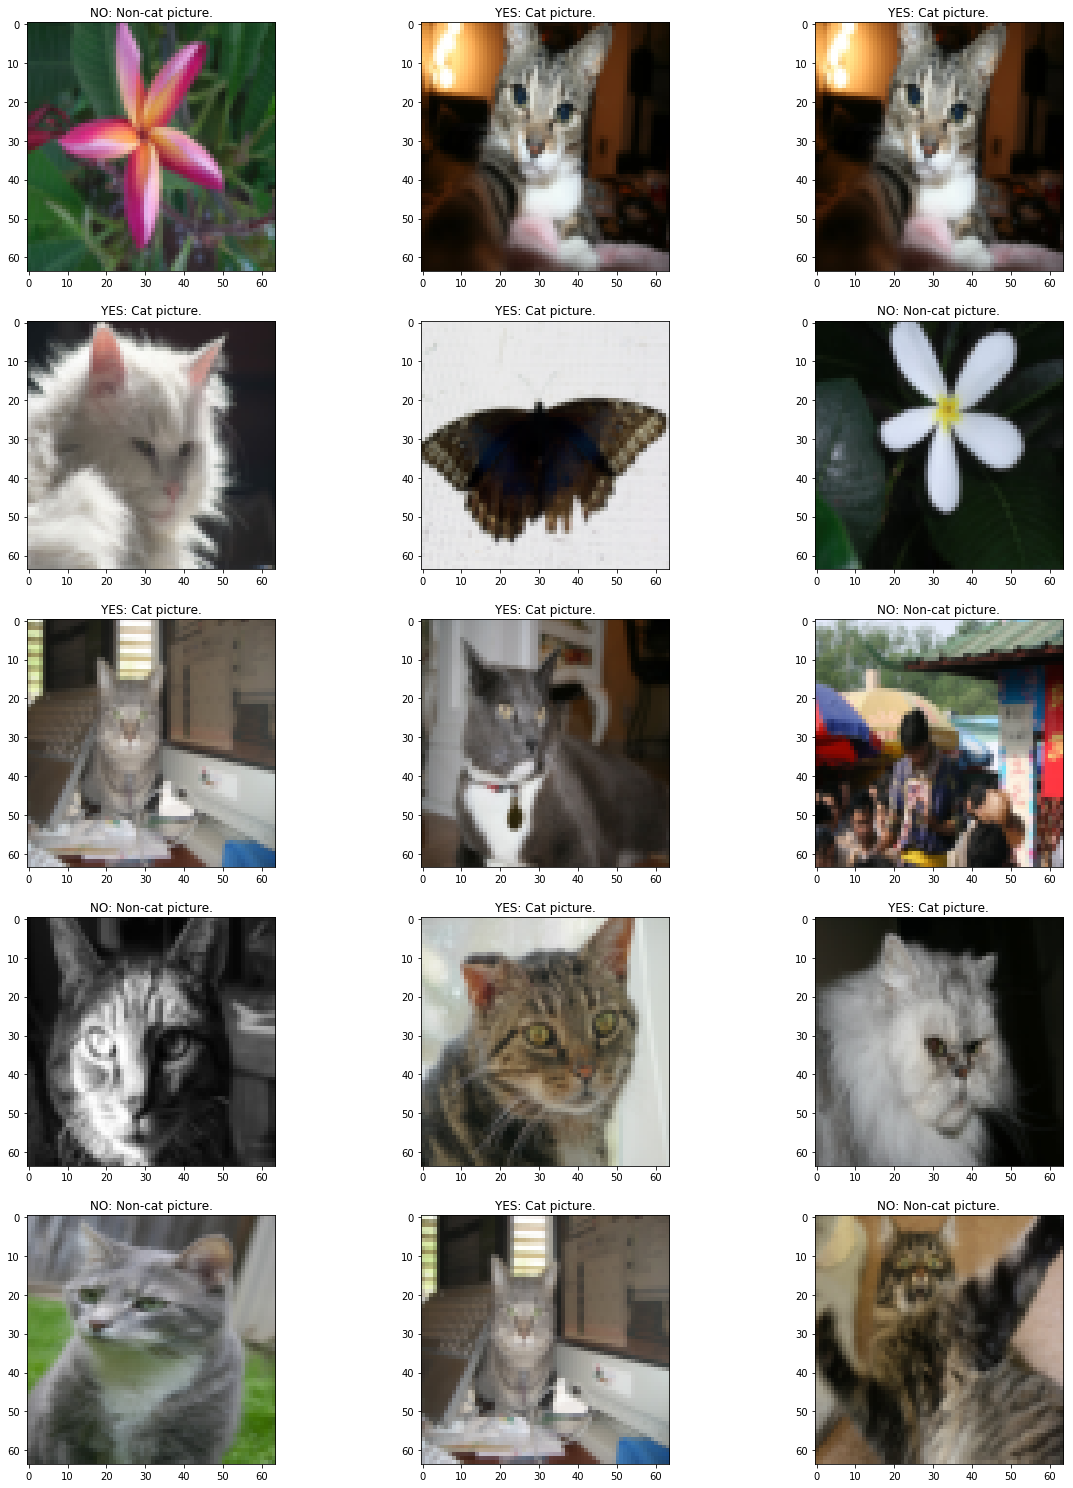

In [29]:
print("TRAINING SET:\nAccuracy: %f" %(visualize_decision(parameters, train_mirrorandrotate_img, train_mirrorandrotate_label, display_img = False)))

print("TESTING SET:\nAccuracy: %f" %(visualize_decision(parameters, testing_imgLoaded, testing_label, display_img = True)))

In [30]:
testing_imgLoaded.shape

(50, 64, 64, 3)